# Importing the libraries


In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [170]:
ds = pd.read_csv('Country-data.csv')

In [171]:
ds

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [172]:
ds[ds.country =='Afghanistan']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


# Undersatnding the data

In [173]:
ds.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [174]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [175]:
ds.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [176]:
ds.shape

(167, 10)

# Data Exploration

In [177]:
features = [
    'child_mort', 'exports', 'health','imports',
    'income', 'inflation', 'life_expec', 'total_fer',
    'gdpp'
]

In [178]:
# Features of smilar scales grouped together for better visibility
features_1 = [
    'income', 'gdpp'
]

features_2 = [
    'child_mort', 'exports','imports',
    'inflation', 'life_expec'
]

features_3 = [
    'health','total_fer'
]


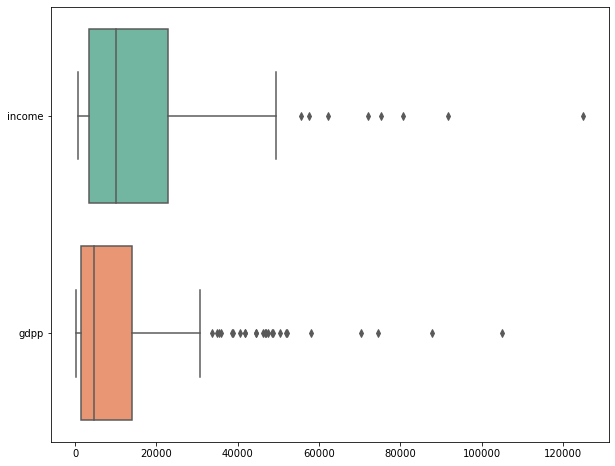

In [179]:
plt.figure(figsize=(10,8))
sns.boxplot(data=ds[features_1], orient="h", palette="Set2");

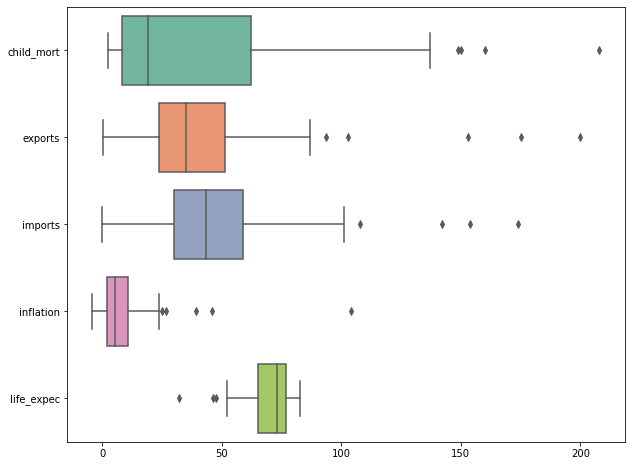

In [180]:
plt.figure(figsize=(10,8))
sns.boxplot(data=ds[features_2], orient="h", palette="Set2");

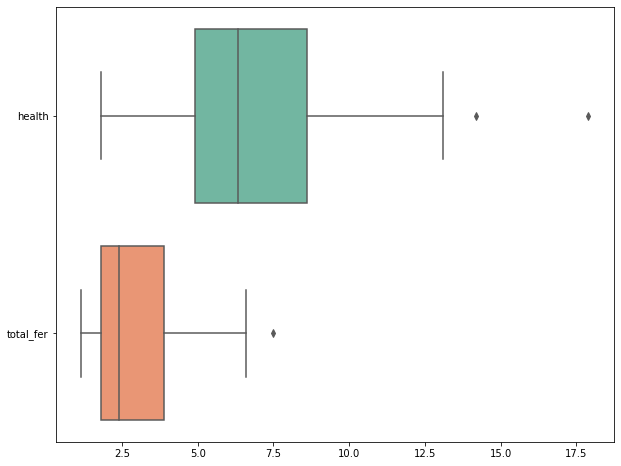

In [181]:
plt.figure(figsize=(10,8))
sns.boxplot(data=ds[features_3], orient="h", palette="Set2");

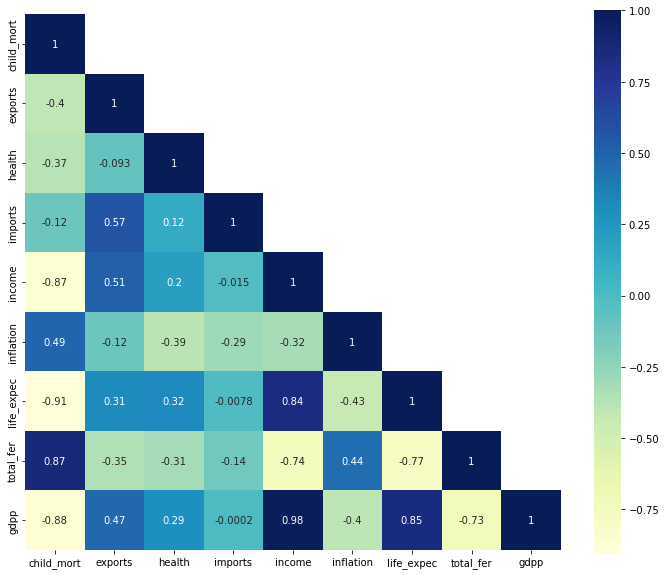

In [182]:
ds_cor_map = ds[features].corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(ds_cor_map, square=True, cmap='YlGnBu', annot=True,  mask=np.triu(ds.corr(),k=1));

# Insights of Heatmap
1.income & gddp have the highest corelation of 0.98, followed by total fer and child mort with 0.87.

2.life expec & child mort have least corelation of -0.91, followed by child mort & gddp  with -0.88.

# Defining the input attributes

In [183]:
X = ds.drop('country',axis=1)
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Feature scaling

In [184]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [185]:
X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# K-Means Clustering

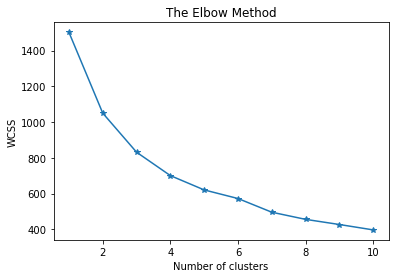

In [186]:
#Using Elbow method to determine the optimum value of K 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Predicting the number of cluster

In [187]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [188]:
y_kmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

# Adding the k-means cluster in the raw dataset

In [189]:
ds['cluster'] = y_kmeans
ds

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


# Centroid vlaues of all 4 clusters.

In [190]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.41982697  0.00664849 -0.21172363  0.04758146 -0.21727424 -0.03495325
   0.26841956 -0.43822217 -0.33080531]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.82860929  0.17262066  0.85918977 -0.29637276  1.46227512 -0.47818851
   1.10764922 -0.76368146  1.66190214]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]]


# Display all the countries with their cluster number

In [191]:
print('Based on K-Means clustering, the countries which belongs to cluster 1 are:')
(ds.loc[ds['cluster']==0]['country']).to_list()

Based on K-Means clustering, the countries which belongs to cluster 1 are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent an

In [192]:
print('Based on K-Means clustering, the countries which belongs to cluster 2 are:')
(ds.loc[ds['cluster']==1]['country']).to_list()

Based on K-Means clustering, the countries which belongs to cluster 2 are:


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [193]:
print('Based on K-Means clustering, the countries which belongs to cluster 3 are:')
(ds.loc[ds['cluster']==2]['country']).to_list()

Based on K-Means clustering, the countries which belongs to cluster 3 are:


['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [194]:
print('Based on K-Means clustering, the countries which belongs to cluster 4 are:')
(ds.loc[ds['cluster']==3]['country']).to_list()

Based on K-Means clustering, the countries which belongs to cluster 4 are:


['Luxembourg', 'Malta', 'Singapore']

In [195]:
# Information of one country from 4 clusters to determine the economic status of the country
for i in ['Afghanistan','Albania', 'Australia', 'Singapore', ]:
    print(ds[ds.country ==i])

       country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   

   life_expec  total_fer  gdpp  cluster  
0        56.2       5.82   553        1  
   country  child_mort  exports  health  imports  income  inflation  \
1  Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  cluster  
1        76.3       1.65  4090        0  
     country  child_mort  exports  health  imports  income  inflation  \
7  Australia         4.8     19.8    8.73     20.9   41400       1.16   

   life_expec  total_fer   gdpp  cluster  
7        82.0       1.93  51900        2  
       country  child_mort  exports  health  imports  income  inflation  \
133  Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer   gdpp  cluster  
133        82.7       1.15  46600        3  


In [196]:
def func(x):
    if x==0:
        return "Developing Countries"
    elif x==1:
        return "Under Developed Countries" 
    elif x==2:
        return "Developed countries"
    else:
        return 'Highly Developed Countries'
ds['k-cluster']=ds['cluster'].map(lambda x: func(x))

In [197]:
ds

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,k-cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Under Developed Countries
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing Countries
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing Countries
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Under Developed Countries
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing Countries
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Developing Countries
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing Countries
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Developing Countries
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,Under Developed Countries


# Hierarchical Clustering

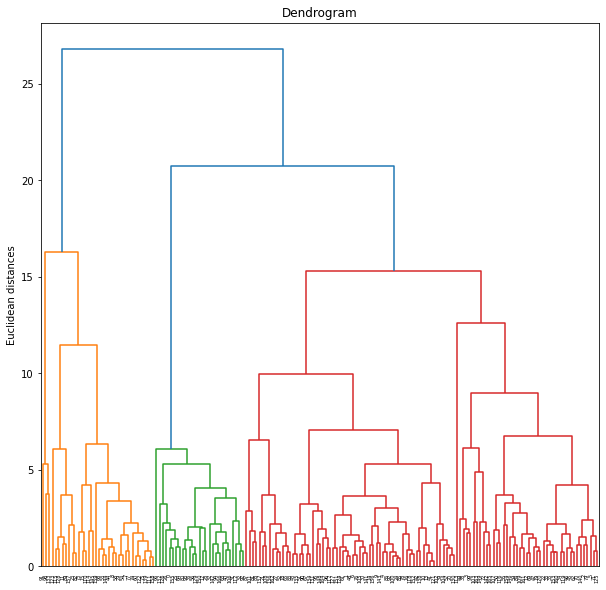

In [198]:
# Using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

 since it is not easy to determine the number of cluster from the dendrogram we use, Silhouette Validation to find the number of clusters

# Silhouette Validation

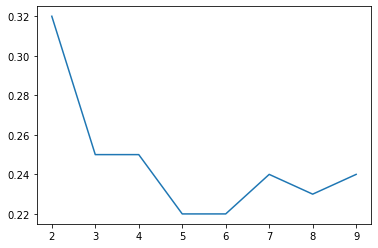

In [199]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
score=[]
for i in range(2,10):
    hc=AgglomerativeClustering(i)
    hc.fit(X)
    score.append(np.round(silhouette_score(X,hc.labels_),2))
plt.plot(range(2,10),score)
plt.show()

 number of clusters determined by silhouette method is 2

# Building the model

In [200]:
res = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_res = res.fit_predict(X)
print(y_res)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [201]:
ds['hier_cluster'] = y_res


In [202]:
ds

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,k-cluster,hier_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Under Developed Countries,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing Countries,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing Countries,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Under Developed Countries,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing Countries,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Developing Countries,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing Countries,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Developing Countries,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,Under Developed Countries,0


In [203]:
print('Based on Hierarchical clustering, the countries which belongs to cluster 1 are:')
# ds.loc[ds['hier_cluster']==0]['country'].to_list()
list_0=[ds.loc[ds['hier_cluster']==0]['country'].to_list()]
print(list_0)

Based on Hierarchical clustering, the countries which belongs to cluster 1 are:
[['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Macedonia,

In [204]:
print('Based on Herarchical clustering, the countries which belongs to cluster 2 are:')
# ds.loc[ds['hier_cluster']==1]['country'].to_list()
list_1=[ds.loc[ds['hier_cluster']==1]['country'].to_list()]
print(list_1)

Based on Herarchical clustering, the countries which belongs to cluster 2 are:
[['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']]


In [205]:
# Information of one country from both cluster to determine the economic status of the country
for i in ['Afghanistan', 'Australia', ]:
    print(ds[ds.country ==i])
    

       country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   

   life_expec  total_fer  gdpp  cluster                  k-cluster  \
0        56.2       5.82   553        1  Under Developed Countries   

   hier_cluster  
0             0  
     country  child_mort  exports  health  imports  income  inflation  \
7  Australia         4.8     19.8    8.73     20.9   41400       1.16   

   life_expec  total_fer   gdpp  cluster            k-cluster  hier_cluster  
7        82.0       1.93  51900        2  Developed countries             1  


In [206]:
def func(x):
    if x==0:
        return 'Developing Countries'
    else:
        return 'Developed Countries'
ds['hierarchical_cluster']=ds['hier_cluster'].map(lambda x: func(x))

In [207]:
ds = ds.drop('hier_cluster',axis=1)
ds = ds.drop('cluster',axis=1)
ds.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k-cluster,hierarchical_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Under Developed Countries,Developing Countries
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Developing Countries,Developing Countries
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developing Countries,Developing Countries
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Under Developed Countries,Developing Countries
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developing Countries,Developing Countries
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Developing Countries,Developing Countries
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Developing Countries,Developing Countries
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Developed countries,Developed Countries
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Developed countries,Developed Countries
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Developing Countries,Developing Countries
